In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="poster", style='ticks', font_scale=0.9)

%matplotlib inline

-------------------------
# Find correlation coefficients & corresponding p-values

In [2]:
methylation = pd.read_table("./datasets/methylation_sigDMD.HM450.tsv", sep="\t")
print(methylation.shape)
methylation.head()

(2595325, 5)


,case_barcode,sample_barcode,aliquot_barcode,sig-DMD,avg_beta_value
0,TCGA-3C-AAAU,TCGA-3C-AAAU-01A,TCGA-3C-AAAU-01A-11D-A41Q-05,sig-DMD_1,0.770000
1,TCGA-3C-AAAU,TCGA-3C-AAAU-01A,TCGA-3C-AAAU-01A-11D-A41Q-05,sig-DMD_10,0.217500
2,TCGA-3C-AAAU,TCGA-3C-AAAU-01A,TCGA-3C-AAAU-01A-11D-A41Q-05,sig-DMD_100,0.720000
3,TCGA-3C-AAAU,TCGA-3C-AAAU-01A,TCGA-3C-AAAU-01A-11D-A41Q-05,sig-DMD_1000,0.046667
4,TCGA-3C-AAAU,TCGA-3C-AAAU-01A,TCGA-3C-AAAU-01A-11D-A41Q-05,sig-DMD_1001,0.280000


In [3]:
methylation_matrix = methylation.groupby(['case_barcode', 'sample_barcode', 'sig-DMD'], 
                                         as_index=False)['avg_beta_value'].mean().pivot(index='sample_barcode', 
                                                                                     columns='sig-DMD', 
                                                                                     values='avg_beta_value')
print(methylation_matrix.shape)
methylation_matrix.head()

(892, 2905)


sig-DMD,sig-DMD_1,sig-DMD_10,sig-DMD_100,sig-DMD_1000,sig-DMD_1001,sig-DMD_1002,sig-DMD_1003,sig-DMD_1004,sig-DMD_1005,sig-DMD_1006,...,sig-DMD_981,sig-DMD_983,sig-DMD_985,sig-DMD_987,sig-DMD_988,sig-DMD_990,sig-DMD_991,sig-DMD_993,sig-DMD_995,sig-DMD_999
sample_barcode,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU-01A,0.77,0.2175,0.72,0.046667,0.280,0.201667,0.666667,0.640,0.094,0.430,...,0.345,0.66,0.676,0.642,0.89,0.51,0.4225,0.485,0.650000,0.10
TCGA-3C-AALI-01A,0.78,0.4750,0.38,0.166667,0.666,0.343333,0.830000,0.728,0.448,0.665,...,0.162,0.30,0.370,0.392,0.44,0.34,0.3125,0.335,0.224286,0.11
TCGA-3C-AALJ-01A,0.74,0.3625,0.43,0.206667,0.632,0.223333,0.820000,0.708,0.252,0.660,...,0.295,0.38,0.430,0.466,0.42,0.40,0.5100,0.600,0.631429,0.10
TCGA-3C-AALK-01A,0.82,0.4725,0.45,0.236667,0.408,0.289091,0.806667,0.650,0.352,0.585,...,0.387,0.52,0.630,0.630,0.66,0.44,0.4725,0.560,0.197143,0.20
TCGA-4H-AAAK-01A,0.69,0.3475,0.39,0.070000,0.260,0.180833,0.790000,0.662,0.148,0.590,...,0.236,0.51,0.580,0.590,0.58,0.42,0.3500,0.700,0.104286,0.18


In [4]:
expression = pd.read_table("./datasets/expression.IlluminaHiSeq.tsv", sep="\t")
print(expression.shape)
expression.head()

(4194180, 6)


,case_barcode,sample_barcode,aliquot_barcode,gene_symbol,normalized_count,transformed_count
0,TCGA-3C-AAAU,TCGA-3C-AAAU-01A,TCGA-3C-AAAU-01A-11R-A41B-07,A1CF,0.0000,0.000000
1,TCGA-3C-AAAU,TCGA-3C-AAAU-01A,TCGA-3C-AAAU-01A-11R-A41B-07,AACS,1087.3986,10.087991
2,TCGA-3C-AAAU,TCGA-3C-AAAU-01A,TCGA-3C-AAAU-01A-11R-A41B-07,AARS2,689.8967,9.432326
3,TCGA-3C-AAAU,TCGA-3C-AAAU-01A,TCGA-3C-AAAU-01A-11R-A41B-07,AASS,45.8396,5.549657
4,TCGA-3C-AAAU,TCGA-3C-AAAU-01A,TCGA-3C-AAAU-01A-11R-A41B-07,AATF,1518.9114,10.569772


In [5]:
expression_matrix = expression.pivot(index='sample_barcode', columns='gene_symbol', values='transformed_count')
print(expression_matrix.shape)
expression_matrix.head()

(1215, 3452)


gene_symbol,A1CF,AACS,AARS2,AASS,AATF,AATK,ABCA10,ABCA2,ABCA5,ABCB5,...,ZNF775,ZNF777,ZNF827,ZNF839,ZNRD1,ZNRF1,ZNRF2,ZP4,ZSCAN2,ZSWIM4
sample_barcode,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU-01A,0.000000,10.087991,9.432326,5.549657,10.569772,9.277504,4.107135,12.138415,9.636794,0.427284,...,6.775676,9.561866,8.079609,8.746215,8.640238,9.162728,8.700333,0.000000,9.188523,8.937861
TCGA-3C-AALI-01A,0.000000,9.709642,8.887225,6.185432,12.901294,6.763773,4.243707,11.186777,8.606584,3.194812,...,7.233982,9.462974,7.764354,8.698203,8.526452,9.012618,9.718050,0.626486,7.892036,8.897247
TCGA-3C-AALJ-01A,0.931002,10.583169,8.783685,6.269705,11.035428,7.190406,4.817547,11.648143,9.130271,2.468088,...,7.049410,9.242494,7.135650,8.623780,9.159659,9.719814,8.063642,0.000000,8.073386,8.927622
TCGA-3C-AALK-01A,0.000000,9.746663,8.758011,7.525796,10.904020,6.918666,4.619589,10.426536,8.690281,1.164271,...,7.271427,8.875789,8.641791,8.249201,8.488462,9.560002,9.307434,0.499476,8.257027,9.293233
TCGA-4H-AAAK-01A,0.511468,9.715962,9.177038,8.596031,10.362294,5.182657,4.983600,9.889099,7.768325,0.511468,...,6.856657,9.220970,8.233620,8.827157,8.421205,8.849954,9.163248,0.511468,8.379010,9.835009


In [6]:
gene_sigDMD = pd.read_table("./preliminary/sig-DMD.union.includeERR.gene_region", sep="\t", header=None)
gene_sigDMD.columns = ['gene_symbol', 'sig-DMD']
gene_sigDMD.set_index('gene_symbol', inplace=True)
print(gene_sigDMD.shape)
gene_sigDMD.head()

(3518, 1)


,sig-DMD
gene_symbol,
A1CF,"sig-DMD_563, sig-DMD_564"
AACS,"sig-DMD_1083, sig-DMD_1084, sig-DMD_1085, sig-..."
AARS2,sig-DMD_3701
AASS,sig-DMD_3915
AATF,sig-DMD_2188


In [7]:
pd.merge(expression_matrix[['AARS2']], methylation_matrix[['sig-DMD_3701']],
         how='inner', left_index=True, right_index=True).shape

(870, 2)

===> 870 samples tested for each pair of gene-signature

----------------------------

In [7]:
def permutation_test(const_var, perm_var, obs_r, n): 
    # Initialize permutation replicates: perm_replicates
    perm_replicates = np.empty(n)

    # Draw replicates
    for i in range(n):
        # Permute perm_var measurments:
        permuted_values = np.random.permutation(perm_var)

        # Compute Pearson correlation
        perm_replicates[i] = np.corrcoef(permuted_values, const_var)[0,1]

    # Compute p-value: p
    p = np.sum(perm_replicates >= obs_r) / len(perm_replicates) if obs_r>0 \
        else np.sum(perm_replicates <= obs_r) / len(perm_replicates)
    
    return(p)

### Warning: The below code cell will involve large number of computations, thus will take hours to complete

In [8]:
dmds_meth = methylation_matrix.columns
corr_coefs_pvals = []
no_meth = []

for g in expression_matrix.columns:
    
    dmds = gene_sigDMD.loc[g, 'sig-DMD'].split(sep=", ")
    regions = dmds_meth.intersection(dmds)
    
    if (len(regions) > 0):
        
        expr = expression_matrix.loc[:, g]
        meth = methylation_matrix.loc[:, regions]
        df = pd.merge(expr, meth, how='inner', left_index=True, right_index=True)

        for r in regions:
            corr_coef = np.corrcoef(df[g], df[r])[0,1]
            if not np.isnan(corr_coef):
                p = permutation_test(const_var = df[r], perm_var = df[g], obs_r = corr_coef, n=10000)
            else: 
                p = np.nan
            corr_coefs_pvals.append([g, r, corr_coef, p])
    else:
        no_meth.append(g)

/home/singuyen/anaconda3/envs/dmv_py36/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in greater_equal
/home/singuyen/anaconda3/envs/dmv_py36/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in less_equal


In [9]:
len(no_meth) #Genes that don't have corresponding methylation of associated sig-DMDs

264

In [10]:
gene_sigDMD_corr = pd.DataFrame(corr_coefs_pvals, columns=['gene_symbol', 'sig-DMD', 'corr_coef', 'p_value'])
print(gene_sigDMD_corr.shape)
gene_sigDMD_corr.head()

(6058, 4)


,gene_symbol,sig-DMD,corr_coef,p_value
0,A1CF,sig-DMD_563,-0.006164,0.4519
1,AACS,sig-DMD_1083,0.028767,0.2015
2,AACS,sig-DMD_1086,0.003141,0.4611
3,AARS2,sig-DMD_3701,-0.084966,0.0055
4,AASS,sig-DMD_3915,-0.308366,0.0000


In [11]:
len(gene_sigDMD_corr['gene_symbol'].unique())

3188

==> We have 3452 genes have expression data, among them 264 don't have corresponding methylation data & 3188 do

In [13]:
# Remove cases where correlation coef OR p_value is NaN
gene_sigDMD_corr.dropna(axis=0, how='any', inplace=True)
print(gene_sigDMD_corr.shape)
len(gene_sigDMD_corr['gene_symbol'].unique())

(6056, 4)


3186

==> 3186 genes have correlation coeficients & corresponding p-values

In [14]:
gene_sigDMD_corr.to_csv("./datasets/gene_sigDMD_corr.tsv", sep="\t", index=None)

-----------------------

In [8]:
gene_sigDMD_corr = pd.read_table("./datasets/gene_sigDMD_corr.tsv", sep="\t")
print(gene_sigDMD_corr.shape)
gene_sigDMD_corr.head()

(6056, 9)


,gene_symbol,sig-DMD,corr_coef,p_value,abs_corr_coef,FDR_BH_Reject,FDR_BH_p,Bonfer_Reject,Bonfer_p
0,A1CF,sig-DMD_563,-0.006164,0.4489,0.006164,False,0.457666,False,1.0
1,AACS,sig-DMD_1083,0.028767,0.1916,0.028767,False,0.221057,False,1.0
2,AACS,sig-DMD_1086,0.003141,0.4596,0.003141,False,0.466377,False,1.0
3,AARS2,sig-DMD_3701,-0.084966,0.0063,0.084966,True,0.009711,False,1.0
4,AASS,sig-DMD_3915,-0.308366,0.0000,0.308366,True,0.000000,True,0.0


In [9]:
gene_sigDMD_corr['abs_corr_coef'] = gene_sigDMD_corr['corr_coef'].abs()

# Correction for multiple tests

In [10]:
import statsmodels.stats.multitest as smm

gene_sigDMD_corr['FDR_BH_Reject'], gene_sigDMD_corr['FDR_BH_p'] = smm.multipletests(gene_sigDMD_corr['p_value'], 
                                                                                    alpha=0.025, 
                                                                                    method='fdr_bh')[:2]

gene_sigDMD_corr['Bonfer_Reject'], gene_sigDMD_corr['Bonfer_p'] = smm.multipletests(gene_sigDMD_corr['p_value'], 
                                                                                    alpha=0.025, 
                                                                                    method='bonferroni')[:2]
gene_sigDMD_corr.head()

,gene_symbol,sig-DMD,corr_coef,p_value,abs_corr_coef,FDR_BH_Reject,FDR_BH_p,Bonfer_Reject,Bonfer_p
0,A1CF,sig-DMD_563,-0.006164,0.4489,0.006164,False,0.457666,False,1.0
1,AACS,sig-DMD_1083,0.028767,0.1916,0.028767,False,0.221057,False,1.0
2,AACS,sig-DMD_1086,0.003141,0.4596,0.003141,False,0.466377,False,1.0
3,AARS2,sig-DMD_3701,-0.084966,0.0063,0.084966,True,0.009711,False,1.0
4,AASS,sig-DMD_3915,-0.308366,0.0000,0.308366,True,0.000000,True,0.0


In [11]:
pd.crosstab(gene_sigDMD_corr['FDR_BH_Reject'], gene_sigDMD_corr['Bonfer_Reject'])

Bonfer_Reject,False,True
FDR_BH_Reject,,
False,1836,0
True,1214,3006


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedbc959d68>,
      dtype=object)

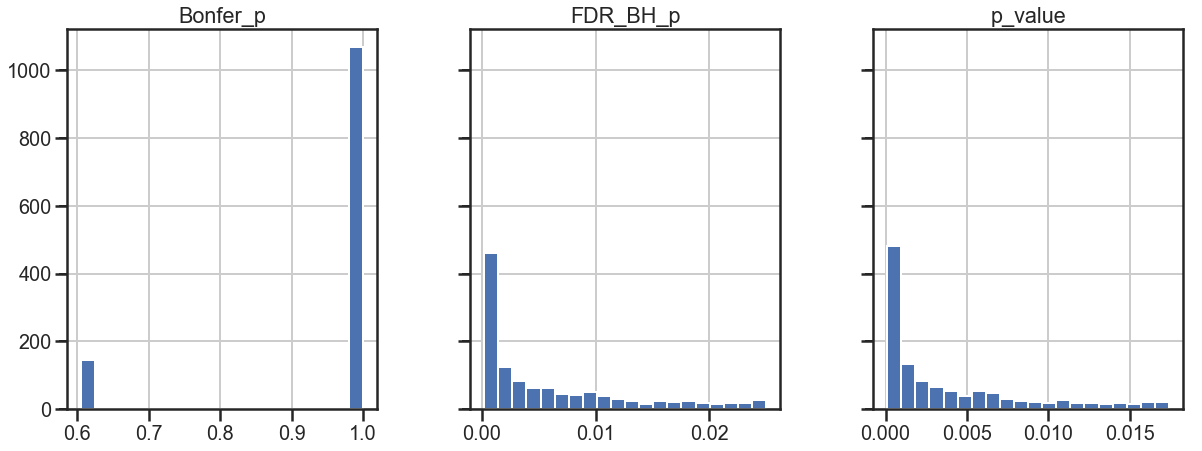

In [12]:
gene_sigDMD_corr.loc[(gene_sigDMD_corr['FDR_BH_Reject']==True) & 
                     (gene_sigDMD_corr['Bonfer_Reject']==False), 
                     ['p_value', 'FDR_BH_p', 'Bonfer_p']].hist(bins=20, figsize=(20,7), layout=(1,3), sharey=True)

In [13]:
gene_sigDMD_corr.to_csv("./datasets/gene_sigDMD_corr.tsv", sep="\t", index=None)

Consider genes with FDR_BH corrected p_values < 0.01 having correlation coefficients that are not occured by chance only. 
# Distribution of correlation coefficients

3941


/home/singuyen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


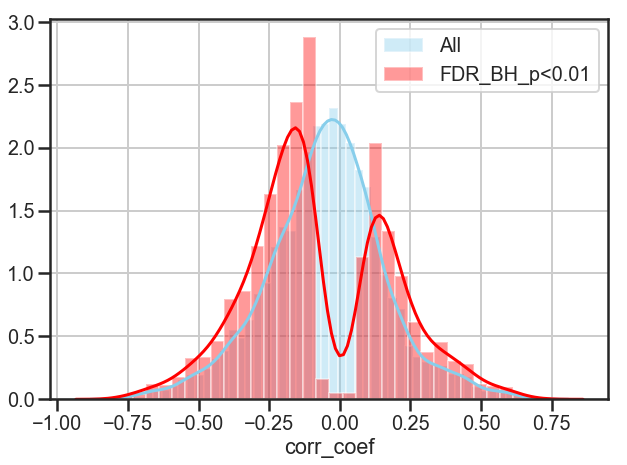

In [14]:
less_1per = gene_sigDMD_corr.loc[gene_sigDMD_corr['FDR_BH_p'] < 0.01]
print(less_1per.shape[0])

fig, ax = plt.subplots(figsize=(10, 7))
sns.distplot(gene_sigDMD_corr["corr_coef"], color="skyblue", label="All")
sns.distplot(less_1per["corr_coef"], color="red", label="FDR_BH_p<0.01")
plt.grid()
plt.legend()

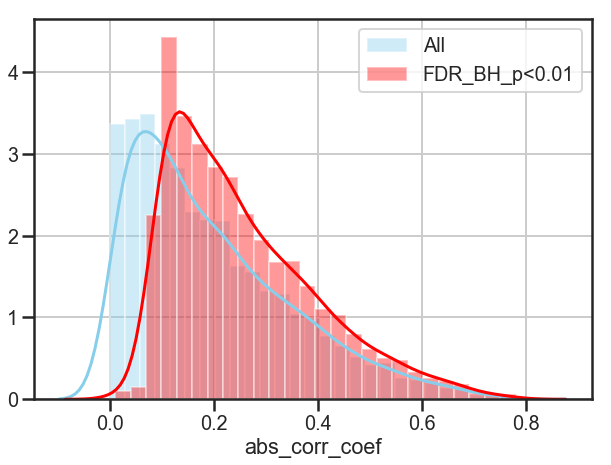

In [15]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.distplot(gene_sigDMD_corr.groupby('gene_symbol')['abs_corr_coef'].max(), color="skyblue", label="All")
sns.distplot(less_1per.groupby('gene_symbol')['abs_corr_coef'].max(), color="red", label="FDR_BH_p<0.01")
plt.grid()
plt.legend()

In [16]:
less_1per.groupby('gene_symbol')['abs_corr_coef'].max().describe()

count    2295.000000
mean        0.256205
std         0.142262
min         0.009637
25%         0.140959
50%         0.222069
75%         0.340760
max         0.779630
Name: abs_corr_coef, dtype: float64

Considered genes with significant correlation coefficients <= -0.2 OR >= 0.2 as significant correlated with methylation of associated sig-DMDs
# Summary on significant correlated genes

In [17]:
correlated_gene = gene_sigDMD_corr.loc[(gene_sigDMD_corr['FDR_BH_p'] < 0.01) & 
                                       (gene_sigDMD_corr['abs_corr_coef'] >= 0.2)]
print(correlated_gene.shape)
correlated_gene.head()

(1899, 9)


,gene_symbol,sig-DMD,corr_coef,p_value,abs_corr_coef,FDR_BH_Reject,FDR_BH_p,Bonfer_Reject,Bonfer_p
4,AASS,sig-DMD_3915,-0.308366,0.0,0.308366,True,0.0,True,0.0
5,AATF,sig-DMD_2188,0.369226,0.0,0.369226,True,0.0,True,0.0
8,ABCA2,sig-DMD_4336,-0.357968,0.0,0.357968,True,0.0,True,0.0
9,ABCA2,sig-DMD_4337,0.290721,0.0,0.290721,True,0.0,True,0.0
11,ABCB5,sig-DMD_3809,-0.307431,0.0,0.307431,True,0.0,True,0.0


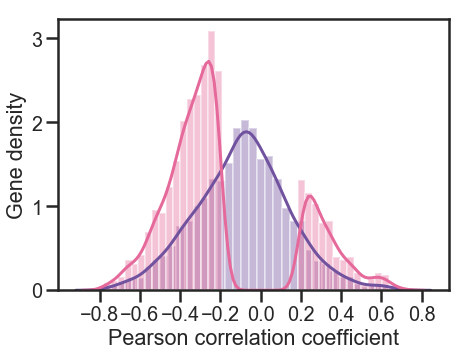

In [18]:
fig, ax = plt.subplots(figsize=(7, 5))

grouped = gene_sigDMD_corr.groupby('gene_symbol', as_index=False)['abs_corr_coef'].max()
df = pd.merge(gene_sigDMD_corr, grouped, how='inner', on=['gene_symbol', 'abs_corr_coef'])
g = sns.distplot(df['corr_coef'], color="#71529e")

grouped = correlated_gene.groupby('gene_symbol', as_index=False)['abs_corr_coef'].max()
df = pd.merge(correlated_gene, grouped, how='inner', on=['gene_symbol', 'abs_corr_coef'])
g = sns.distplot(df['corr_coef'], color="#e5699a")

g.set_xlabel("Pearson correlation coefficient")
g.set_ylabel("Gene density")

ax.set_xticks(np.arange(-0.8, 0.81, step=0.2))

fig.savefig("plots/corr_genes.hist.svg", transparent=True, bbox_inches='tight')

In [19]:
print(correlated_gene['abs_corr_coef'].min())
correlated_gene.loc[correlated_gene['abs_corr_coef'] == correlated_gene['abs_corr_coef'].min()].head()

0.20003194014145992


,gene_symbol,sig-DMD,corr_coef,p_value,abs_corr_coef,FDR_BH_Reject,FDR_BH_p,Bonfer_Reject,Bonfer_p
1626,GMPPA,sig-DMD_2805,0.200032,0.0,0.200032,True,0.0,True,0.0


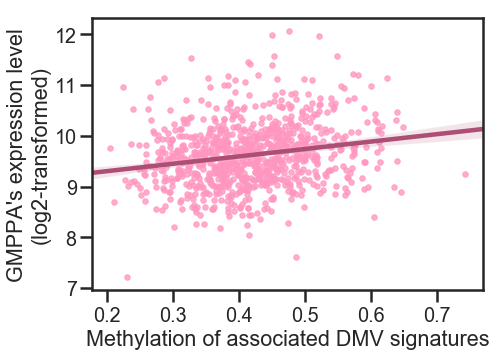

In [20]:
fig, ax = plt.subplots(figsize=(7, 5))

data = pd.merge(expression_matrix[['GMPPA']], methylation_matrix[['sig-DMD_2805']], left_index=True, right_index=True)

g = sns.regplot(x="sig-DMD_2805", y="GMPPA", data=data, fit_reg=True,
                scatter_kws={"color": "#ff96c0", "s":30}, line_kws={"color": "#ad4e74"});
g.set_xlabel("Methylation of associated DMV signatures")
g.set_ylabel("GMPPA's expression level\n(log2-transformed)")

fig.savefig("plots/corr_genes.regplot.minp.svg", transparent=True, bbox_inches='tight')

In [21]:
print(correlated_gene['abs_corr_coef'].max())
correlated_gene.loc[correlated_gene['abs_corr_coef'] == correlated_gene['abs_corr_coef'].max()].head()

0.7796300524523433


,gene_symbol,sig-DMD,corr_coef,p_value,abs_corr_coef,FDR_BH_Reject,FDR_BH_p,Bonfer_Reject,Bonfer_p
473,CA12,sig-DMD_1541,-0.77963,0.0,0.77963,True,0.0,True,0.0


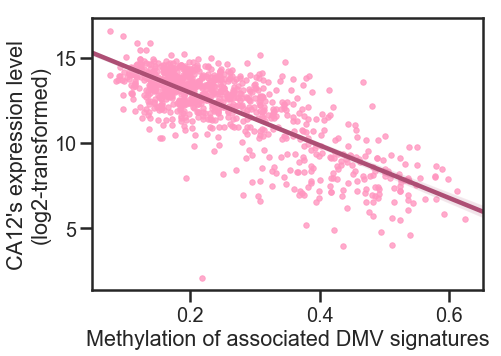

In [22]:
fig, ax = plt.subplots(figsize=(7, 5))

data = pd.merge(expression_matrix[['CA12']], methylation_matrix[['sig-DMD_1541']], left_index=True, right_index=True)

g = sns.regplot(x="sig-DMD_1541", y="CA12", data=data, fit_reg=True,
                scatter_kws={"color": "#ff96c0", "s":30}, line_kws={"color": "#ad4e74"});
g.set_xlabel("Methylation of associated DMV signatures")
g.set_ylabel("CA12's expression level\n(log2-transformed)")

fig.savefig("plots/corr_genes.regplot.maxp.svg", transparent=True, bbox_inches='tight')

In [23]:
gene_meta = pd.read_table("./metadata/associated_genes_list.tsv", sep="\t")
print(gene_meta.shape)
gene_meta.head()

(3518, 5)


,gene_symbol,BRCA,TN-BRCA,nonTN-BRCA,EndoR-BRCA
0,A1CF,Yes,No,No,Yes
1,AACS,Yes,No,No,No
2,AARS2,Yes,No,No,No
3,AASS,Yes,Yes,Yes,No
4,AATF,Yes,No,No,No


In [24]:
correlated_gene_bigtable = pd.merge(correlated_gene, gene_meta, how='inner', on='gene_symbol')
print(correlated_gene_bigtable.shape)
correlated_gene_bigtable.head()

(1899, 13)


,gene_symbol,sig-DMD,corr_coef,p_value,abs_corr_coef,FDR_BH_Reject,FDR_BH_p,Bonfer_Reject,Bonfer_p,BRCA,TN-BRCA,nonTN-BRCA,EndoR-BRCA
0,AASS,sig-DMD_3915,-0.308366,0.0,0.308366,True,0.0,True,0.0,Yes,Yes,Yes,No
1,AATF,sig-DMD_2188,0.369226,0.0,0.369226,True,0.0,True,0.0,Yes,No,No,No
2,ABCA2,sig-DMD_4336,-0.357968,0.0,0.357968,True,0.0,True,0.0,Yes,Yes,Yes,No
3,ABCA2,sig-DMD_4337,0.290721,0.0,0.290721,True,0.0,True,0.0,Yes,Yes,Yes,No
4,ABCB5,sig-DMD_3809,-0.307431,0.0,0.307431,True,0.0,True,0.0,Yes,No,No,No


In [25]:
print('Number of correlated genes that are associated with subtype-specific sig-DMD:')
print(correlated_gene_bigtable.loc[(correlated_gene_bigtable['BRCA']=='Yes') | 
                                   (correlated_gene_bigtable['TN-BRCA']=='Yes') | 
                                   (correlated_gene_bigtable['nonTN-BRCA']=='Yes'), 
                                   'gene_symbol'].unique().shape[0])

print("Number of correlated genes that are associated with ERR sig-DMD")
print(correlated_gene_bigtable.loc[correlated_gene_bigtable['EndoR-BRCA']=='Yes', 'gene_symbol'].unique().shape[0])

Number of correlated genes that are associated with subtype-specific sig-DMD:
1271
Number of correlated genes that are associated with ERR sig-DMD
105


In [26]:
bigtable = pd.merge(gene_sigDMD_corr.drop_duplicates(subset='gene_symbol'), gene_meta, how='inner', on='gene_symbol')

print('Number of tested genes that are associated with subtype-specific sig-DMD:')
print(bigtable.loc[(bigtable['BRCA']=='Yes') | 
                   (bigtable['TN-BRCA']=='Yes') | 
                   (bigtable['nonTN-BRCA']=='Yes'), 
                   'gene_symbol'].unique().shape[0])

print("Number of tested genes that are associated with ERR sig-DMD")
print(bigtable.loc[bigtable['EndoR-BRCA']=='Yes', 'gene_symbol'].unique().shape[0])

Number of tested genes that are associated with subtype-specific sig-DMD:
3141
Number of tested genes that are associated with ERR sig-DMD
221


In [27]:
correlated_gene_bigtable.to_csv("./datasets/correlated_gene_bigtable.tsv", sep="\t", index=None)